# Micro-Lab 02 — Determinant as Area Scaling

Goal: Visualize how a 2x2 matrix transforms the unit square and verify that |det(A)| equals the area scaling factor.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

np.set_printoptions(precision=4, suppress=True)

def polygon_area(vertices: np.ndarray) -> float:
    """
    Compute polygon area using the shoelace formula.

    Args:
        vertices: array of shape (N, 2) with polygon vertices in order.

    Returns:
        Area as a positive float.
    """
    # TODO: implement shoelace formula
    x = vertices[:, 0]
    y = vertices[:, 1]
    return 0.5 * abs(np.dot(x, np.roll(y, -1)) - np.dot(y, np.roll(x, -1)))

def transform_points(points: np.ndarray, matrix: np.ndarray) -> np.ndarray:
    """
    Apply linear transformation to a set of 2D points.

    Args:
        points: array of shape (N, 2)
        matrix: array of shape (2, 2)

    Returns:
        Transformed points of shape (N, 2)
    """
    return points @ matrix.T

def plot_transformation(matrix: np.ndarray, title: str) -> None:
    """
    Plot unit square and transformed parallelogram, and compare area with det(A).

    Args:
        matrix: 2x2 transformation matrix
        title: plot title
    """
    # TODO: define unit square vertices
    # TODO: transform vertices
    # TODO: compute area and compare with determinant
    # TODO: plot both polygons
    square = np.array([
        [0.0, 0.0],
        [1.0, 0.0],
        [1.0, 1.0],
        [0.0, 1.0],
    ])

    transformed = transform_points(square, matrix)

    area_original = polygon_area(square)
    area_transformed = polygon_area(transformed)

    det = np.linalg.det(matrix)

    print("A =\n", matrix)
    print(f"det(A) = {det:.6f}")
    print(f"original area = {area_original:.6f}")
    print(f"transformed area = {area_transformed:.6f}")
    print(f"area scaling (abs) = {area_transformed / area_original:.6f}")

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.add_patch(Polygon(square, closed=True, fill=False, linestyle="--"))
    ax.add_patch(Polygon(transformed, closed=True, alpha=0.3))

    ax.set_title(title)
    ax.axhline(0, linewidth=1)
    ax.axvline(0, linewidth=1)
    ax.set_aspect("equal", adjustable="box")
    ax.grid(True)
    plt.show()


I = np.eye(2)
print("det(I) =", np.linalg.det(I))

det(I) = 1.0


In [5]:
square = np.array([
    [0.0, 0.0],
    [1.0, 0.0],
    [1.0, 1.0],
    [0.0, 1.0],
])

print("unit square area =", polygon_area(square))
assert abs(polygon_area(square) - 1.0) < 1e-12


unit square area = 1.0


A =
 [[1. 0.]
 [0. 1.]]
det(A) = 1.000000
original area = 1.000000
transformed area = 1.000000
area scaling (abs) = 1.000000


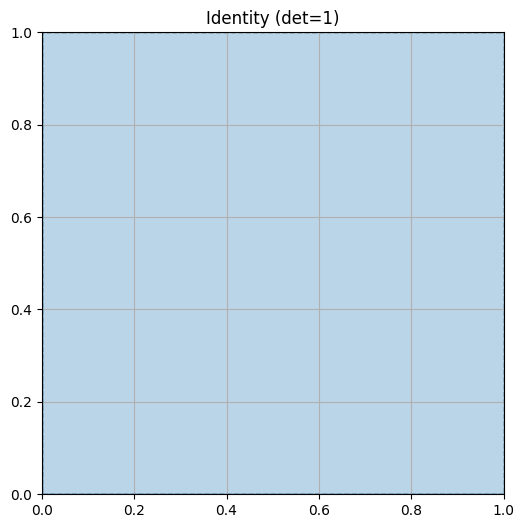

A =
 [[2. 0.]
 [0. 3.]]
det(A) = 6.000000
original area = 1.000000
transformed area = 6.000000
area scaling (abs) = 6.000000


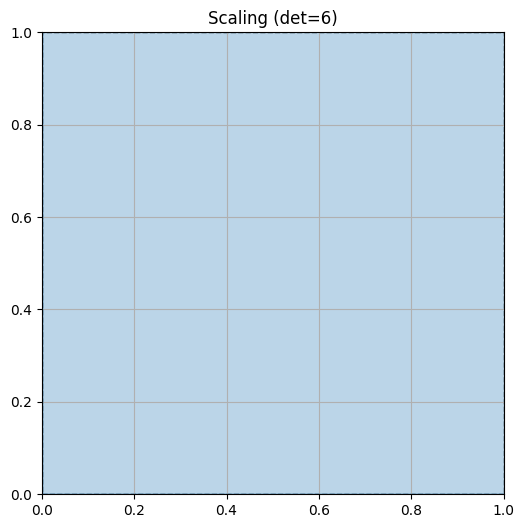

In [6]:
plot_transformation(np.eye(2), "Identity (det=1)")
plot_transformation(np.array([[2.0, 0.0],[0.0, 3.0]]), "Scaling (det=6)")


In [7]:
# Sanity 1: identity
A = np.eye(2)
square = np.array([[0.,0.],[1.,0.],[1.,1.],[0.,1.]])
assert abs(polygon_area(transform_points(square, A)) - 1.0) < 1e-12

# Sanity 2: diagonal scaling (2 * 3 = 6)
A = np.array([[2.0, 0.0],[0.0, 3.0]])
assert abs(polygon_area(transform_points(square, A)) - 6.0) < 1e-12

# Sanity 3: singular (dependent columns)
A = np.array([[1.0, 1.0],[2.0, 2.0]])
assert polygon_area(transform_points(square, A)) < 1e-10
assert abs(np.linalg.det(A)) < 1e-12
